# Arrival Rates 

In [1]:
import dask.dataframe as dd
import pandas as pd
import os
import csv
import traceback
import logging
import numpy as np
import geopandas as gp
import scipy.stats as st
arrival_count_map = {}
inter_arrival_map = {}
source_df = pd.read_csv("/home/blakemoss/911_modeling/ts_data_map.csv")

boulder_fire_rescue_2015_2019.csv
******************************
detroit_pd_filtered_2019.csv
******************************
tempe_als_2018.csv
******************************
first_unit_sf_fire_2019.csv
******************************


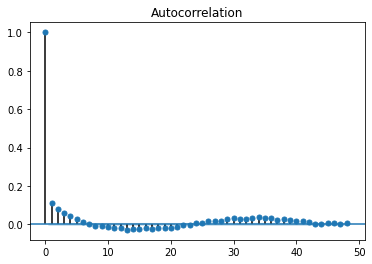

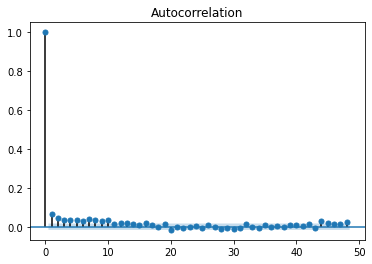

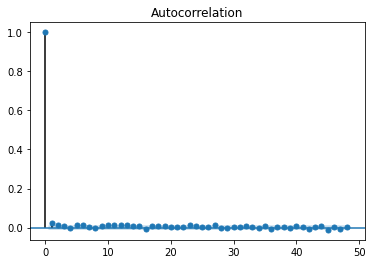

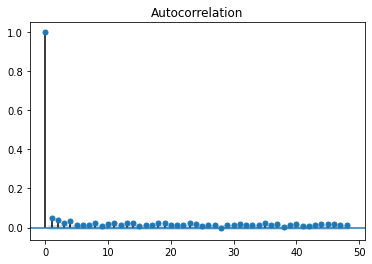

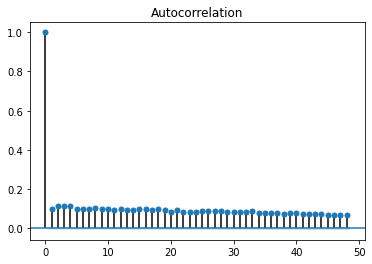

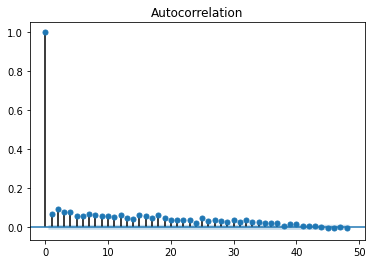

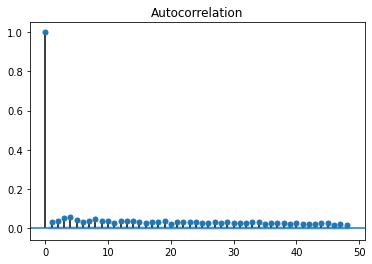

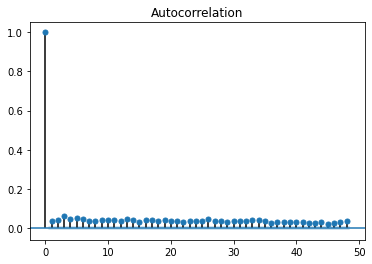

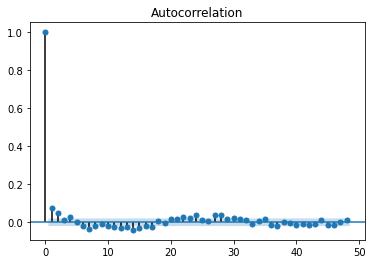

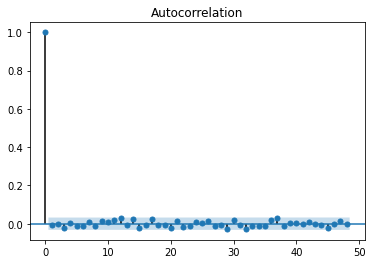

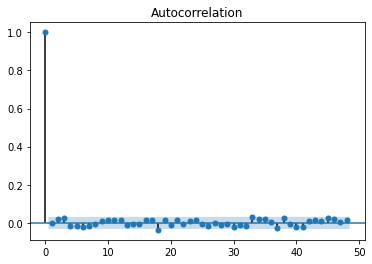

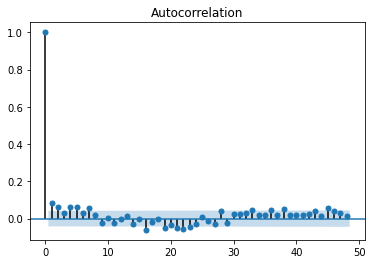

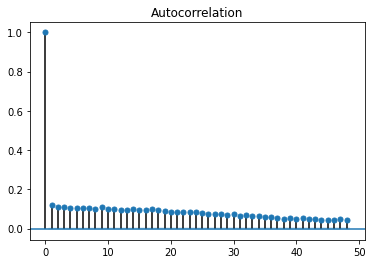

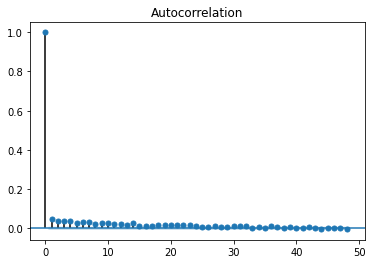

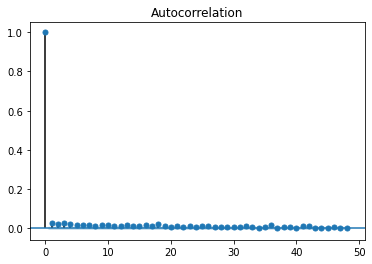

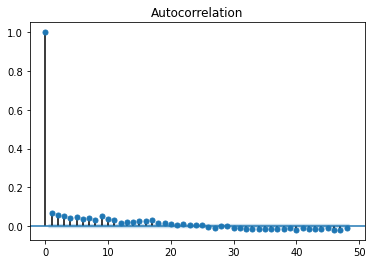

In [5]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline
data_map = source_df.dropna(subset=["call_received"])
for index, row in data_map.iterrows():
    print(row['Dataset'])
    dataset_path = "/home/blakemoss/911_modeling/data_retrieval/csvs/{}".format(row['Dataset'])
    filename = row['Dataset']
    columns = [row['call_received'], row['unique_id']]
    c = columns[0]
    unique_id = columns[1]
    df = dd.read_csv(dataset_path, usecols=columns)
    df = df.dropna()
    df = df.compute()
    df[c] = pd.to_datetime(df[c], errors="coerce", infer_datetime_format=True)
    df = df.sort_values(by=c,ascending=True)
    df['delta'] = (df[c]-df[c].shift()).dt.seconds.fillna(np.float64(0))
    df = df[df['delta']!= np.float64(0)]
    df.index = df[c]
    only_hour_groups = df.groupby([df.index.hour])
    calls_time_of_day = only_hour_groups[unique_id].count()
    day_watch = df.between_time('07:00','15:00')
    swing_watch = df.between_time('15:00','23:00')
    midnight_watch = df.between_time('23:00','07:00')
    plot_acf(df['delta'], lags=48)
    #lag_plot(df['delta'])
    plot_acf(day_watch['delta'], lags=48)
    plot_acf(swing_watch['delta'], lags=48)
    plot_acf(midnight_watch['delta'], lags=48)
    print("******************************")
    #midnight_group = midnight_watch.groupby([midnight_watch.index.year, midnight_watch.index.month, midnight_watch.index.day, midnight_watch.index.hour])[unique_id].count()
    #day_group = day_watch.groupby([day_watch.index.year, day_watch.index.month, day_watch.index.day, day_watch.index.hour])[unique_id].count()
    #swing_group = swing_watch.groupby([swing_watch.index.year, swing_watch.index.month, swing_watch.index.day, swing_watch.index.hour])[unique_id].count()
    #total_arrival_counts = df.groupby([df.index.year, df.index.month, df.index.day, df.index.hour])[unique_id].count()
    #arrival_count_map[filename] = {"day (7AM-3PM)": day_group.values, "swing (3PM-11:PM)": swing_group.values, "midnight (11PM-7AM)": midnight_group.values, "All": total_arrival_counts.values}
    #inter_arrival_map[filename] = {"day (7AM-3PM)": day_watch['delta'].values, "swing (3PM-11:PM)": swing_watch['delta'].values, "midnight (11PM-7AM)": midnight_watch['delta'].values, "All": df['delta'].values}


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted alpha distribution with error=1.7752855665104715e-05)
Fitted anglit distribution with error=2.745406891265523e-05)


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:422: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


Fitted arcsine distribution with error=2.4773011606370465e-05)
Fitted argus distribution with error=3.0385586729460543e-05)


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Fitted beta distribution with error=8.674043407674433e-08)


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:708: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:712: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Fitted betaprime distribution with error=3.519199679726285e-08)
Fitted bradford distribution with error=2.756176084940576e-05)
Fitted burr distribution with error=2.8986967887297337e-07)
Fitted burr12 distribution with error=5.335230220731757e-08)
Fitted cauchy distribution with error=5.938232291178774e-06)
Fitted chi distribution with error=1.6881779307706212e-06)
Fitted chi2 distribution with error=3.1483553960129914e-05)
Fitted cosine distribution with error=2.6338824397696614e-05)
Fitted crystalball distribution with error=1.1220007676010424e-05)
Fitted dgamma distribution with error=7.244729955958336e-06)
Fitted dweibull distribution with error=1.1633997389423205e-05)


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00025.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.00016666666666666666.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.0002777777777777778.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.000462962962962963.


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.7922638888888892.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.7358688271604943.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9909490740740747.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.8833600823045273

/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6665680602615125.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6679632244554552.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6654087138303775.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6672564886925996

/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6771651565221588.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6819700054379321.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6842672179068734.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.6918708065809542

/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9934704685580475.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9932641260684997.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0030050836438407.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9913778373002957

/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9964506961950559.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9964939087311815.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.996374026884183.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9965049213397437.

/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.996644245092805.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9965990209744335.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9967861939824203.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9967067391510305.

/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9961459947937514.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9972395909830365.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9969855754844927.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9971180213528053

/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9741973808981417.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9757850244333883.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9710915310204906.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9647248841921949

/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.909574451337775.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9112554762629519.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9101347929795007.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.910975305442089.


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9044960791539762.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9026616971317831.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.904037483648428.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9019134508817142.

/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.901575483424131.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9017649801851255.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9016386490111292.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9017333973916264.

/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.901685733902347.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9016734305052929.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9016773204224935.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9016763435409689.

/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9016740542032036.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.901673461695278.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9016733737767517.
  RuntimeWarning)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2847: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 0.9016722983450158.

Fitted erlang distribution with error=8.012862236099464e-08)
Fitted expon distribution with error=1.2369702117989172e-07)
Fitted exponnorm distribution with error=1.2149405412786124e-07)
Fitted exponpow distribution with error=1.1907310271316811e-06)


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1608: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


Fitted exponweib distribution with error=2.9774140627189884e-08)
Fitted f distribution with error=8.228184002137644e-08)
Fitted fatiguelife distribution with error=5.764962565824123e-07)
Fitted fisk distribution with error=4.482622622688993e-07)
Fitted foldcauchy distribution with error=3.076910599715593e-07)
Fitted foldnorm distribution with error=4.275691208575867e-06)
Fitted frechet_l distribution with error=3.232082057216427e-05)
Fitted frechet_r distribution with error=6.99977916742381e-08)
Fitted gamma distribution with error=3.157417341101048e-05)


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:3373: RuntimeWarning: divide by zero encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


Fitted gausshyper distribution with error=7.522544835949038e-06)
Fitted genexpon distribution with error=1.2370427337693082e-07)
Fitted genextreme distribution with error=3.740389469749608e-07)
Fitted gengamma distribution with error=2.9052305456997646e-07)


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


Fitted genhalflogistic distribution with error=1.592194037043386e-06)
Fitted geninvgauss distribution with error=1.0247671968664481e-07)
Fitted genlogistic distribution with error=4.849343667630749e-06)
Fitted gennorm distribution with error=8.16028280537733e-06)


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


Fitted genpareto distribution with error=5.9818348495893384e-09)
Fitted gilbrat distribution with error=3.590643640899015e-07)
Fitted gompertz distribution with error=9.90149115779993e-08)
Fitted gumbel_l distribution with error=2.3284190613892847e-05)
Fitted gumbel_r distribution with error=4.854257397175316e-06)
Fitted halfcauchy distribution with error=4.036026118619236e-07)
Fitted halfgennorm distribution with error=2.6786135013391636e-08)
Fitted halflogistic distribution with error=1.5920708170221422e-06)
Fitted halfnorm distribution with error=4.2753080269140075e-06)
Fitted hypsecant distribution with error=7.183118787068248e-06)
Fitted invgamma distribution with error=3.452192133382007e-07)
Fitted invgauss distribution with error=5.299133672183778e-07)
Fitted invweibull distribution with error=3.740403315156689e-07)
Fitted johnsonsb distribution with error=4.877323635537774e-07)
Fitted johnsonsu distribution with error=4.814223527003567e-07)
Fitted kappa3 distribution with error

/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:97: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)


SKIPPED ksone distribution (taking more than 30 seconds)
Fitted kstwobign distribution with error=6.2164503164318296e-06)
Fitted laplace distribution with error=6.5974825794515875e-06)
Fitted levy distribution with error=2.5996731148319278e-06)
Fitted levy_l distribution with error=3.057804939027287e-05)
SKIPPED levy_stable distribution (taking more than 30 seconds)
SKIPPED loggamma distribution (taking more than 30 seconds)
Fitted logistic distribution with error=8.022519340936313e-06)


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


Fitted loglaplace distribution with error=1.8242529523440543e-06)
SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED loguniform distribution (taking more than 30 seconds)
SKIPPED lomax distribution (taking more than 30 seconds)
Fitted maxwell distribution with error=9.038935448237488e-06)
SKIPPED mielke distribution (taking more than 30 seconds)
Fitted moyal distribution with error=3.167781374853137e-06)
SKIPPED nakagami distribution (taking more than 30 seconds)


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:5544: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
Fitted norm distribution with error=1.1220008171848619e-05)
SKIPPED norminvgauss distribution (taking more than 30 seconds)
SKIPPED pareto distribution (taking more than 30 seconds)
SKIPPED pearson3 distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
SKIPPED powerlognorm distribution (taking more than 30 seconds)
SKIPPED powernorm distribution (taking more than 30 seconds)
Fitted rayleigh distribution with error=8.432258759149116e-06)
SKIPPED rdist distribution (taking more than 30 seconds)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
SKIPPED reciprocal distribution (taking more than 30 seconds)
SKIPPED rice distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taki

/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


SKIPPED triang distribution (taking more than 30 seconds)
SKIPPED truncexpon distribution (taking more than 30 seconds)
SKIPPED truncnorm distribution (taking more than 30 seconds)


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:7248: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


SKIPPED tukeylambda distribution (taking more than 30 seconds)
Fitted uniform distribution with error=3.0052914767034253e-05)
SKIPPED vonmises distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)
Fitted wald distribution with error=2.2400933038158285e-07)
SKIPPED weibull_max distribution (taking more than 30 seconds)
SKIPPED weibull_min distribution (taking more than 30 seconds)
Fitted wrapcauchy distribution with error=nan)


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/optimize/optimize.py:597: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


<IPython.core.display.Javascript object>


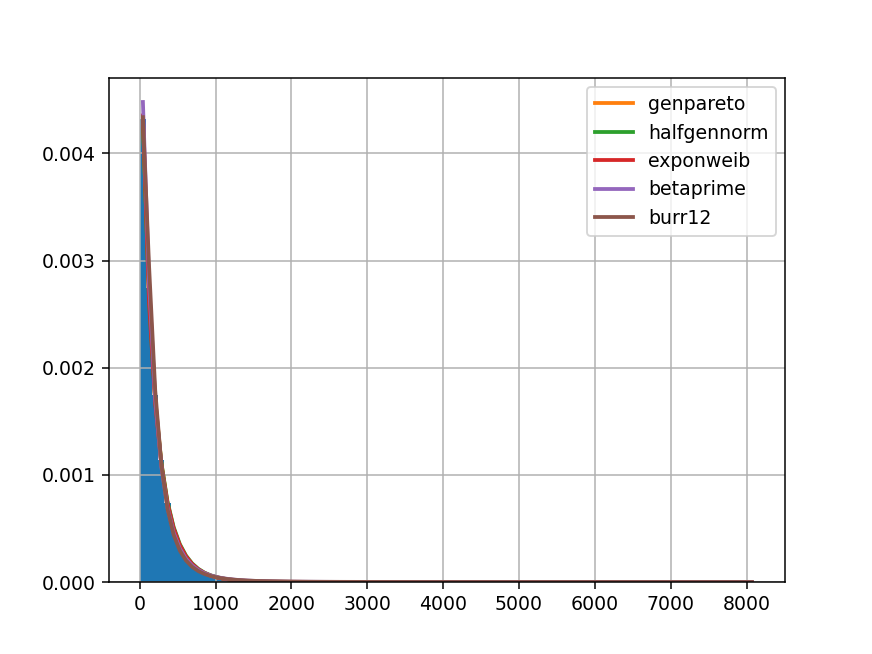

,sumsquare_error,aic,bic,kl_div
genpareto,5.981835e-09,3345.257117,-4.715779e+06,inf
halfgennorm,2.678614e-08,4071.416927,-4.486771e+06,inf
exponweib,2.977414e-08,4072.173935,-4.470604e+06,inf
betaprime,3.519200e-08,3010.474403,-4.445066e+06,inf
burr12,5.335230e-08,2884.551526,-4.381504e+06,inf


In [86]:
import matplotlib.pyplot as plt
%matplotlib notebook
#np.set_printoptions(suppress=True)
x = inter_arrival_map["first_unit_sf_fire_2019.csv"]["All"]
from fitter import Fitter
f = Fitter(x)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)
x = inter_arrival_map["detroit_pd_filtered_2019.csv"]["day (7AM-3PM)"]
#plot_acf(x,lags=25)
x = np.random.choice(x,size=5000)
histo, bin_edges = np.histogram(x, bins=100)
print("*********************")
print(np.mean(x))
print(np.std(x))
print(st.variation(x))
print("------------------")
targs = st.exponweib.fit(x,floc=0)
gargs = st.gamma.fit(x,floc=0)
pargs = st.genpareto.fit(x,floc=0)
print(targs)
args = st.expon.fit(x, floc=0)
print(args)
new_histo = []
#for c, e in enumerate(histo):
#    if e>5:
#        new_histo.append(e)
#    else:
#        add = sum(histo[c:])
#        new_histo.append(add)
#        last = bin_edges[-1]
#        bin_edges = bin_edges[:c+1]
#        bin_edges = np.append(bin_edges, last)
#        break
#print(new_histo)
#print(bin_edges)
#histo = histo[:20]
print(histo)
w = st.expon(*args)
cdf = st.expon.cdf(bin_edges, *args)
wcdf = st.exponweib.cdf(bin_edges, *targs)
gcdf = st.gamma.cdf(bin_edges, *gargs)
pcdf = st.genpareto.cdf(bin_edges, *pargs)
print("--------------------------")
#print(cdf)
print("--------------------------")
#print(np.diff(cdf))
print("---------------------------")
expected_values = len(x) * np.diff(cdf)
wexpected_values = len(x) * np.diff(wcdf)
gexpected_values = len(x) * np.diff(gcdf)
pexpected_values = len(x) * np.diff(pcdf)
#expected_values = np.diff(cdf)
#wexpected_values = np.diff(wcdf)
#gexpected_values = np.diff(gcdf)
#pexpected_values = np.diff(pcdf)
#expected_values = expected_values[:20]
print(wexpected_values)

j = st.kstest(x, "genpareto")
print(j)
j = st.kstest(x, "expon")
print(j)


#print(expected_values)
f = st.chisquare(histo[:34], f_exp=wexpected_values[:34], ddof=4)
print(f)

r = st.chisquare(histo[:34], f_exp=expected_values[:34], ddof=4)
print(r)
g = st.chisquare(histo[:34], f_exp=gexpected_values[:34], ddof=3)
print(g)
p = st.chisquare(histo[:34], f_exp=pexpected_values[:34], ddof=4)
print(p)
#a = st.power_divergence(histo, f_exp=expected_values, ddof=2, axis=0, lambda_=-1)
#print(a)
#b = st.kstest(x, w.cdf)
#print(b)
fig, ax = plt.subplots()
ax.plot(bin_edges[:-1], histo, 'ro')
#ax.plot(bin_edges[:-1], expected_values)
#ax.plot(bin_edges[:-1], wexpected_values)
ax.plot(bin_edges[:-1], gexpected_values)
#a = st.anderson(histo,dist='expon')
#print(a)

*********************
167.2836
182.65979297875052
1.0919169182080641
------------------


/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/home/blakemoss/.virtualenvs/911_modeling-CJoBgkS_/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(1.4483233699693403, 0.7885513935439681, 0, 113.15030870343153)
(0.0, 167.2836)
[574 493 443 413 351 297 299 240 211 167 166 127 122 119  95  95  71  62
  60  55  50  50  47  42  32  26  26  24  19  19  14  16  14  23   8  18
  11   7   4   7   4   9   5   2   7   3   3   1   6   3   4   5   1   2
   5   4   1   0   0   1   0   0   1   3   2   3   0   0   1   1   0   0
   0   1   1   1   2   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   1]
--------------------------
--------------------------
---------------------------
[551.59116645 516.93997768 454.71914813 397.05243717 346.55117677
 302.91351771 265.3129061  232.89214481 204.88222669 180.62348818
 159.55902498 141.22107918 125.21694286 111.21635895  98.94084661
  88.15485584  78.65850323  70.28162267  62.87889035  56.32582155
  50.51547331  45.35571921  40.76698868  36.68038495  33.03611252
  29.78215856  26.87318372  24.26958577  21.93670704  19.84416124
  17.96526035  16.27652521  14.7572

TypeError: _parse_args() missing 1 required positional argument: 'c'

In [ ]:
#x = arrival_count_map["first_unit_sf_fire_2019.csv"]["swing (3PM-11:PM)"]
#histo, bin_edges = np.histogram(x, bins=6)
#print(histo)
#mean = np.mean(x)
#cdf = st.poisson.cdf(bin_edges, mean)
#expected_values = len(x) * np.diff(cdf)
#print(expected_values)
#a = st.power_divergence(histo, f_exp=expected_values, ddof=2, axis=0, lambda_=0)
#print(a)

In [ ]:
import csv
def record_stats(row):
    with open("/home/blakemoss/911_modeling/Random Variable Analysis/analysis.csv") as f:
        writer = csv.writer(f):
        writer.writerow(row)
        
def get_stats(name, _type, shift, count):
    mean = np.mean(count)
    std_dev = np.std(count)
    cv = st.variation(count)
    median = np.median(count)
    max_ = np.maximum(count)
    min_ = np.minimum(count)
    return [name, ]

In [ ]:
 def plot_arrival_histogram(name, obj):
    for shift, count in obj.items():
        p = st.poisson(np.mean(count))
        fig, ax = plt.subplots()
        t = [x for x in range(int(max(count)))]
        density = True
        n, bins, patches = ax.hist(count, bins=len(t), density=density)
        x = [a for a in range(int(bins[-1]))]
        ax.plot(x,p.pmf(x),'k')
        ax.set_title("Arrival Count Histogram {}, {} ({})".format(name, shift, np.mean(count)))
        ax.set_xlabel("# of Incidents Created in an Hour (Bucket)")
        if density is True:
            ax.set_ylabel("Probability")
        else:
            ax.set_ylabel("Frequency")
        
def plot_interarrival_histogram(name, obj):
    for shift, count in obj.items():
        e = st.expon
        args = e.fit(count)
        t = [x for x in range(int(max(count)))]
        #t = st.iqr(count)
        #print(t)
        density = True
        fig, ax = plt.subplots()
        #ax.boxplot(count)
        n, bins, patches = ax.hist(count, bins=len(t), density=density)
        cdf = stats.expon.cdf(bins, *args)
        expected_values = n * np.diff(cdf)
        x = [a for a in range(int(bins[-1]))]
        y = e.pdf(x, *args)
        ax.plot(x,y,'k')
        ax.set_title("Interarrival Time Histogram {}, {} ({})".format(name, shift, args))
        ax.set_xlabel("# Elapsed Time between Incidents (Buckets)")
        if density is True:
            ax.set_ylabel("Probability")
        else:
            ax.set_ylabel("Frequency")

In [ ]:
import matplotlib.pyplot as plt
for name, obj in inter_arrival_map.items():
    plot_interarrival_histogram(name, obj)

In [ ]:
for name, obj in arrival_count_map.items():
    plot_arrival_histogram(name, obj)